In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import matplotlib.dates as mdates
from scipy import stats
import seaborn as sns
%matplotlib inline

In [111]:
file = "/home/faheem/Desktop/csv/31_Dec/PMS70032.csv"
pmsensor2 = pd.read_csv(file,error_bad_lines=False,encoding='ISO-8859-1')
pmsensor2.head()

b'Skipping line 860: expected 5 fields, saw 11\nSkipping line 894: expected 5 fields, saw 8\nSkipping line 898: expected 5 fields, saw 9\nSkipping line 899: expected 5 fields, saw 7\nSkipping line 900: expected 5 fields, saw 7\nSkipping line 906: expected 5 fields, saw 7\nSkipping line 909: expected 5 fields, saw 6\nSkipping line 912: expected 5 fields, saw 7\nSkipping line 913: expected 5 fields, saw 7\nSkipping line 920: expected 5 fields, saw 7\nSkipping line 921: expected 5 fields, saw 11\nSkipping line 923: expected 5 fields, saw 8\nSkipping line 1163: expected 5 fields, saw 6\n'
b'Skipping line 825782: expected 5 fields, saw 7\n'
b'Skipping line 1052323: expected 5 fields, saw 6\n'
/home/faheem/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2018/12/12 07:06:49  PMS70032  70  117  133
0  2018/12/12 07:06:50  PMS70032  69  119  134
1  2018/12/12 07:06:51  PMS70032  69  117  132
2  2018/12/12 07:06:52  PMS70032  69  116  133
3  2018/12/12 07:06:53  PMS70032  69  116  130
4  2018/12/12 07:06:54  PMS70032  70  118  134

In [112]:
pmsensor2 = pmsensor2.rename(columns={'2018/12/12 07:06:49':'DateTime','70':'PM_1_0','117':'PM_2_5','133':'PM_10'})
pmsensor2['DateTime'] = pd.to_datetime(pmsensor2['DateTime'],errors='coerce')
pmsensor2['PM_1_0'] = pd.to_numeric(pmsensor2['PM_1_0'],errors='coerce')
pmsensor2['PM_2_5'] = pd.to_numeric(pmsensor2['PM_2_5'],errors='coerce')
pmsensor2['PM_10'] = pd.to_numeric(pmsensor2['PM_10'],errors='coerce')
ref1 = pd.to_datetime('2018-12-17 00:00:00')
ref2 = pd.to_datetime('2018-12-26 00:00:00')
pmsensor2 = pmsensor2.loc[(pmsensor2['DateTime']>ref1) & (pmsensor2['DateTime']<ref2),:]
pmsensor2_1h = pmsensor2.resample('1H',on='DateTime').mean()
pmsensor2_1h.head()

PM_1_0      PM_2_5       PM_10
DateTime                                               
2018-12-17 00:00:00  138.142754  230.155272  260.949206
2018-12-17 01:00:00  139.867421  239.619827  271.329163
2018-12-17 02:00:00  147.173012  255.318554  292.164096
2018-12-17 03:00:00  145.331726  253.298216  289.864031
2018-12-17 04:00:00  152.837187  276.348025  319.714595

In [113]:
pmsensor2_1h.tail()

PM_1_0      PM_2_5       PM_10
DateTime                                               
2018-12-25 19:00:00  133.570602  264.351566  313.867229
2018-12-25 20:00:00  140.677590  286.612771  344.463614
2018-12-25 21:00:00  152.122651  319.595181  387.185301
2018-12-25 22:00:00  151.561222  320.798172  391.546548
2018-12-25 23:00:00  139.928950  294.874037  357.993015

In [114]:
file = '/home/faheem/Downloads/history_export_2018-12-31T09_32_40.csv'
weather = pd.read_csv(file)
weather = weather.drop(weather[['Year','Month','Day','Hour']],axis=1)
weather.head()

DateTime  Temperature  [2 m above gnd]  \
0  2018-12-17 0:0                         15.61   
1  2018-12-17 1:0                         14.60   
2  2018-12-17 2:0                         13.54   
3  2018-12-17 3:0                         12.41   
4  2018-12-17 4:0                         11.29   

   Relative Humidity  above gnd]  Mean Sea Level Pressure [MSL]  \
0                                29                         1020.6   
1                                31                         1020.7   
2                                33                         1020.5   
3                                35                         1020.4   
4                                38                         1020.9   

   Total Precipitation (high resolution)  [sfc]  Wind Speed  [10 m above gnd]  \
0                                             0                          1.88   
1                                             0                          1.94   
2                                             0                          2.01   
3                                             0                          2.11   
4                                             0                          2.14   

   Wind Direction  Wind Speed  [80 m above gnd]  \
0          295.20                          3.74   
1          281.89                          3.10   
2          275.71                          2.91   
3          275.44                          2.97   
4          280.78                          3.08   

   Wind Direction  above gnd]  Wind Speed [900 mb]  \
0                          344.48                 1.60   
1                          339.23                 1.32   
2                          333.43                 1.34   
3                          327.38                 1.63   
4                          324.25                 2.12   

   Wind Direction  [900 mb]  Wind Gust  [sfc]  
0                      3.58               4.0  
1                    351.25               4.0  
2                    333.43               3.7  
3                    317.49               3.7  
4                    315.00               3.8

In [115]:
weather.tail()

DateTime  Temperature  [2 m above gnd]  \
315  2018-12-30 3:0                         13.53   
316  2018-12-30 4:0                         13.12   
317  2018-12-30 5:0                         12.81   
318  2018-12-30 6:0                         11.92   
319  2018-12-30 7:0                         11.05   

     Relative Humidity  above gnd]  Mean Sea Level Pressure [MSL]  \
315                                27                         1020.0   
316                                28                         1020.1   
317                                28                         1020.6   
318                                30                         1021.0   
319                                33                         1021.4   

     Total Precipitation (high resolution)  [sfc]  \
315                                             0   
316                                             0   
317                                             0   
318                                             0   
319                                             0   

     Wind Speed  [10 m above gnd]  Wind Direction  \
315                          0.32          108.43   
316                          0.10          360.00   
317                          0.32          341.57   
318                          0.54          338.20   
319                          0.67          333.43   

     Wind Speed  [80 m above gnd]  Wind Direction  above gnd]  \
315                          0.72                          123.69   
316                          0.41                          165.96   
317                          0.45                          206.57   
318                          0.72                          236.31   
319                          0.95                          251.57   

     Wind Speed [900 mb]  Wind Direction  [900 mb]  Wind Gust  [sfc]  
315                 5.24                    325.10               0.8  
316                 5.63                    326.59               0.6  
317                 5.80                    327.68               0.8  
318                 5.85                    326.85               1.1  
319                 5.80                    327.68               1.3

In [116]:
weather.describe()

Temperature  [2 m above gnd]  Relative Humidity  above gnd]  \
count                    320.000000                        320.000000   
mean                      16.241313                         27.571875   
std                        4.347145                          9.015895   
min                        6.830000                         13.000000   
25%                       12.625000                         20.000000   
50%                       16.725000                         26.500000   
75%                       19.892500                         33.000000   
max                       23.940000                         56.000000   

       Mean Sea Level Pressure [MSL]  \
count                     320.000000   
mean                     1017.536250   
std                         1.855838   
min                      1012.600000   
25%                      1016.300000   
50%                      1017.400000   
75%                      1018.700000   
max                      1023.000000   

       Total Precipitation (high resolution)  [sfc]  \
count                                         320.0   
mean                                            0.0   
std                                             0.0   
min                                             0.0   
25%                                             0.0   
50%                                             0.0   
75%                                             0.0   
max                                             0.0   

       Wind Speed  [10 m above gnd]  Wind Direction  \
count                    320.000000      320.000000   
mean                       2.000438      256.932719   
std                        0.901725       77.980697   
min                        0.100000       10.300000   
25%                        1.500000      269.350000   
50%                        1.910000      280.780000   
75%                        2.322500      300.002500   
max                        4.880000      360.000000   

       Wind Speed  [80 m above gnd]  Wind Direction  above gnd]  \
count                    320.000000                      320.000000   
mean                       3.072094                      267.947563   
std                        1.213951                       81.765594   
min                        0.410000                       14.040000   
25%                        2.135000                      276.932500   
50%                        3.105000                      299.740000   
75%                        3.980000                      312.977500   
max                        5.530000                      360.000000   

       Wind Speed [900 mb]  Wind Direction  [900 mb]  Wind Gust  [sfc]  
count           320.000000                320.000000        320.000000  
mean              5.400500                303.389500          3.569062  
std               2.362278                 44.230025          1.300595  
min               0.410000                  3.580000          0.600000  
25%               3.700000                300.642500          2.600000  
50%               5.100000                311.820000          3.700000  
75%               7.652500                320.630000          4.600000  
max               9.420000                360.000000          6.300000

In [117]:
weather['DateTime'] = pd.to_datetime(weather['DateTime'],errors='coerce')
ref1 = pd.to_datetime('2018-12-17 00:00:00')
ref2 = pd.to_datetime('2018-12-26 00:00:00')
weather_1h= weather.loc[(weather['DateTime']>=ref1) & (weather['DateTime']<ref2),:]

In [118]:
weather_1h.head()

DateTime  Temperature  [2 m above gnd]  \
0 2018-12-17 00:00:00                         15.61   
1 2018-12-17 01:00:00                         14.60   
2 2018-12-17 02:00:00                         13.54   
3 2018-12-17 03:00:00                         12.41   
4 2018-12-17 04:00:00                         11.29   

   Relative Humidity  above gnd]  Mean Sea Level Pressure [MSL]  \
0                                29                         1020.6   
1                                31                         1020.7   
2                                33                         1020.5   
3                                35                         1020.4   
4                                38                         1020.9   

   Total Precipitation (high resolution)  [sfc]  Wind Speed  [10 m above gnd]  \
0                                             0                          1.88   
1                                             0                          1.94   
2                                             0                          2.01   
3                                             0                          2.11   
4                                             0                          2.14   

   Wind Direction  Wind Speed  [80 m above gnd]  \
0          295.20                          3.74   
1          281.89                          3.10   
2          275.71                          2.91   
3          275.44                          2.97   
4          280.78                          3.08   

   Wind Direction  above gnd]  Wind Speed [900 mb]  \
0                          344.48                 1.60   
1                          339.23                 1.32   
2                          333.43                 1.34   
3                          327.38                 1.63   
4                          324.25                 2.12   

   Wind Direction  [900 mb]  Wind Gust  [sfc]  
0                      3.58               4.0  
1                    351.25               4.0  
2                    333.43               3.7  
3                    317.49               3.7  
4                    315.00               3.8

In [119]:
weather_1h.tail()

DateTime  Temperature  [2 m above gnd]  \
211 2018-12-25 19:00:00                         18.57   
212 2018-12-25 20:00:00                         17.88   
213 2018-12-25 21:00:00                         17.02   
214 2018-12-25 22:00:00                         15.97   
215 2018-12-25 23:00:00                         14.96   

     Relative Humidity  above gnd]  Mean Sea Level Pressure [MSL]  \
211                                18                         1015.1   
212                                19                         1015.6   
213                                20                         1016.1   
214                                22                         1016.2   
215                                23                         1016.0   

     Total Precipitation (high resolution)  [sfc]  \
211                                             0   
212                                             0   
213                                             0   
214                                             0   
215                                             0   

     Wind Speed  [10 m above gnd]  Wind Direction  \
211                          1.70          298.07   
212                          1.58          288.43   
213                          1.73          280.01   
214                          1.81          276.34   
215                          2.01          275.71   

     Wind Speed  [80 m above gnd]  Wind Direction  above gnd]  \
211                          3.84                          308.66   
212                          3.83                          310.76   
213                          3.89                          313.96   
214                          3.82                          315.00   
215                          3.89                          316.04   

     Wind Speed [900 mb]  Wind Direction  [900 mb]  Wind Gust  [sfc]  
211                 6.84                    307.87               4.6  
212                 6.76                    308.40               4.4  
213                 6.72                    306.53               4.3  
214                 6.74                    305.34               4.1  
215                 6.91                    304.38               4.5

In [120]:
weather_1h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 12 columns):
DateTime                                        216 non-null datetime64[ns]
Temperature  [2 m above gnd]                    216 non-null float64
Relative Humidity  above gnd]                216 non-null int64
Mean Sea Level Pressure [MSL]                   216 non-null float64
Total Precipitation (high resolution)  [sfc]    216 non-null int64
Wind Speed  [10 m above gnd]                    216 non-null float64
Wind Direction                                  216 non-null float64
Wind Speed  [80 m above gnd]                    216 non-null float64
Wind Direction  above gnd]                  216 non-null float64
Wind Speed [900 mb]                             216 non-null float64
Wind Direction  [900 mb]                        216 non-null float64
Wind Gust  [sfc]                                216 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 21.9 KB


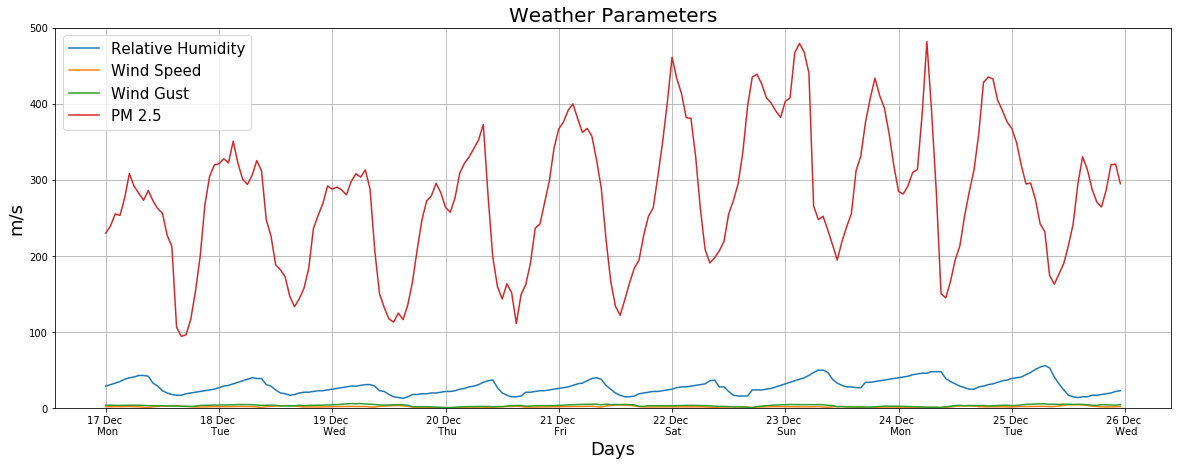

In [121]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
#plt.plot(weather['DateTime'],weather['Temperature  [2 m above gnd]'],label='Temp.')
plt.plot(weather_1h['DateTime'],weather_1h['Relative Humidity [2m above gnd]'],label='Relative Humidity')
plt.plot(weather_1h['DateTime'],weather_1h['Wind Speed  [10 m above gnd]'],label='Wind Speed')
plt.plot(weather_1h['DateTime'],weather_1h['Wind Gust  [sfc]'],label='Wind Gust')
plt.plot(pmsensor2_1h.index,pmsensor2_1h['PM_2_5'],label='PM 2.5')
plt.ylim(0,500)
plt.grid(True)
plt.xlabel('Days',fontsize=18)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b \n %a'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('m/s',fontsize=18)
plt.legend(loc='upper left',fontsize=15)
#plt.xlim(xmin="2018-10-12 00:00:00")
plt.title('Weather Parameters',fontsize=20)
plt.show()

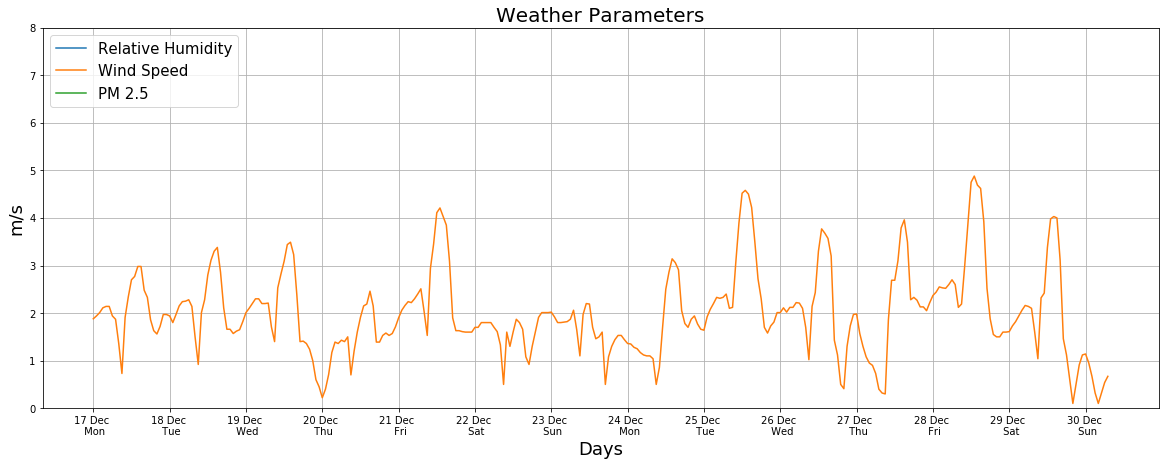

In [122]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
#plt.plot(weather['DateTime'],weather['Temperature  [2 m above gnd]'],label='Temp.')
plt.plot(weather['DateTime'],weather['Relative Humidity [2m above gnd]'],label='Relative Humidity')
plt.plot(weather['DateTime'],weather['Wind Speed  [10 m above gnd]'],label='Wind Speed')
#plt.plot(weather['DateTime'],weather['Wind Gust  [sfc]'],label='Wind Gust')
plt.plot(pmsensor2_1h.index,pmsensor2_1h['PM_2_5'],label='PM 2.5')
plt.ylim(0,8)
plt.grid(True)
plt.xlabel('Days',fontsize=18)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b \n %a'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.ylabel('m/s',fontsize=18)
plt.legend(loc='upper left',fontsize=15)
#plt.xlim(xmin="2018-10-12 00:00:00")
plt.title('Weather Parameters',fontsize=20)
plt.show()

In [123]:
weather_1h.head()

DateTime  Temperature  [2 m above gnd]  \
0 2018-12-17 00:00:00                         15.61   
1 2018-12-17 01:00:00                         14.60   
2 2018-12-17 02:00:00                         13.54   
3 2018-12-17 03:00:00                         12.41   
4 2018-12-17 04:00:00                         11.29   

   Relative Humidity  above gnd]  Mean Sea Level Pressure [MSL]  \
0                                29                         1020.6   
1                                31                         1020.7   
2                                33                         1020.5   
3                                35                         1020.4   
4                                38                         1020.9   

   Total Precipitation (high resolution)  [sfc]  Wind Speed  [10 m above gnd]  \
0                                             0                          1.88   
1                                             0                          1.94   
2                                             0                          2.01   
3                                             0                          2.11   
4                                             0                          2.14   

   Wind Direction  Wind Speed  [80 m above gnd]  \
0          295.20                          3.74   
1          281.89                          3.10   
2          275.71                          2.91   
3          275.44                          2.97   
4          280.78                          3.08   

   Wind Direction  above gnd]  Wind Speed [900 mb]  \
0                          344.48                 1.60   
1                          339.23                 1.32   
2                          333.43                 1.34   
3                          327.38                 1.63   
4                          324.25                 2.12   

   Wind Direction  [900 mb]  Wind Gust  [sfc]  
0                      3.58               4.0  
1                    351.25               4.0  
2                    333.43               3.7  
3                    317.49               3.7  
4                    315.00               3.8

In [124]:
weather_1h.tail()

DateTime  Temperature  [2 m above gnd]  \
211 2018-12-25 19:00:00                         18.57   
212 2018-12-25 20:00:00                         17.88   
213 2018-12-25 21:00:00                         17.02   
214 2018-12-25 22:00:00                         15.97   
215 2018-12-25 23:00:00                         14.96   

     Relative Humidity  above gnd]  Mean Sea Level Pressure [MSL]  \
211                                18                         1015.1   
212                                19                         1015.6   
213                                20                         1016.1   
214                                22                         1016.2   
215                                23                         1016.0   

     Total Precipitation (high resolution)  [sfc]  \
211                                             0   
212                                             0   
213                                             0   
214                                             0   
215                                             0   

     Wind Speed  [10 m above gnd]  Wind Direction  \
211                          1.70          298.07   
212                          1.58          288.43   
213                          1.73          280.01   
214                          1.81          276.34   
215                          2.01          275.71   

     Wind Speed  [80 m above gnd]  Wind Direction  above gnd]  \
211                          3.84                          308.66   
212                          3.83                          310.76   
213                          3.89                          313.96   
214                          3.82                          315.00   
215                          3.89                          316.04   

     Wind Speed [900 mb]  Wind Direction  [900 mb]  Wind Gust  [sfc]  
211                 6.84                    307.87               4.6  
212                 6.76                    308.40               4.4  
213                 6.72                    306.53               4.3  
214                 6.74                    305.34               4.1  
215                 6.91                    304.38               4.5

In [125]:
stats.pearsonr(pmsensor2_1h['PM_2_5'],weather_1h['Wind Speed  [10 m above gnd]'])

(-0.33676490219199945, 3.9874932045233604e-07)

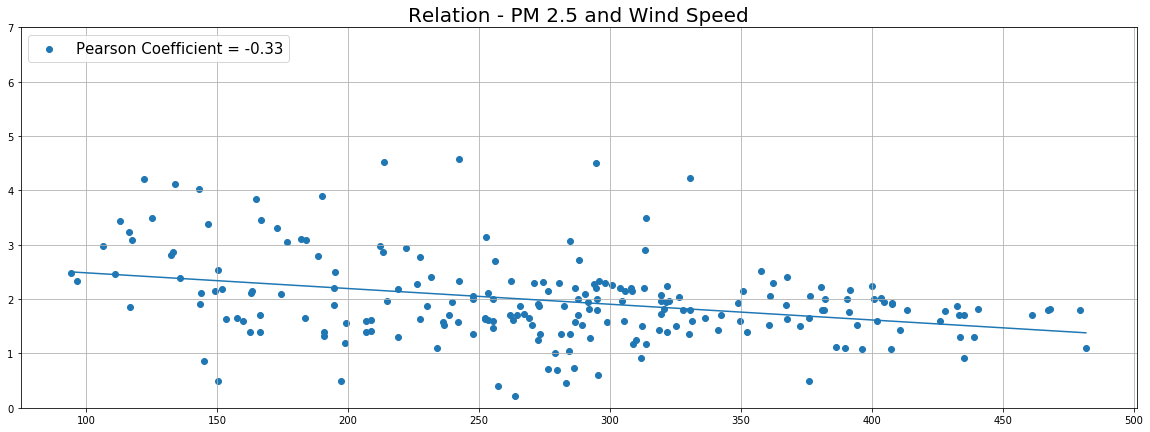

In [126]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
plt.scatter(pmsensor2_1h['PM_2_5'],weather_1h['Wind Speed  [10 m above gnd]'],label='Pearson Coefficient = -0.33')
plt.title('Relation - PM 2.5 and Wind Speed',fontsize=20)
plt.plot(np.unique(pmsensor2_1h['PM_2_5']), np.poly1d(np.polyfit(pmsensor2_1h['PM_2_5'], weather_1h['Wind Speed  [10 m above gnd]'], 1))(np.unique(pmsensor2_1h['PM_2_5'])))
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,7)
plt.grid(True)
plt.show()

In [127]:
stats.pearsonr(pmsensor2_1h['PM_2_5'],weather_1h['Relative Humidity [2m above gnd]'])

(0.33869284206086875, 3.3891259255017155e-07)

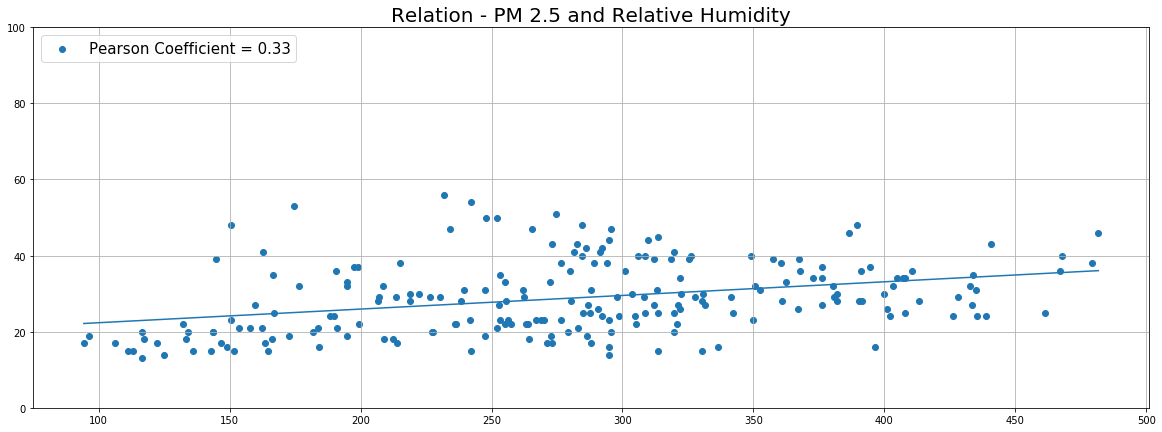

In [128]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
plt.scatter(pmsensor2_1h['PM_2_5'],weather_1h['Relative Humidity [2m above gnd]'],label='Pearson Coefficient = 0.33')
plt.title('Relation - PM 2.5 and Relative Humidity',fontsize=20)
plt.plot(np.unique(pmsensor2_1h['PM_2_5']), np.poly1d(np.polyfit(pmsensor2_1h['PM_2_5'], weather_1h['Relative Humidity [2m above gnd]'], 1))(np.unique(pmsensor2_1h['PM_2_5'])))
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,100)
plt.grid(True)
plt.show()

In [129]:
stats.pearsonr(pmsensor2_1h['PM_2_5'],weather_1h['Temperature  [2 m above gnd]'])

(-0.4232571747513361, 8.457965590039245e-11)

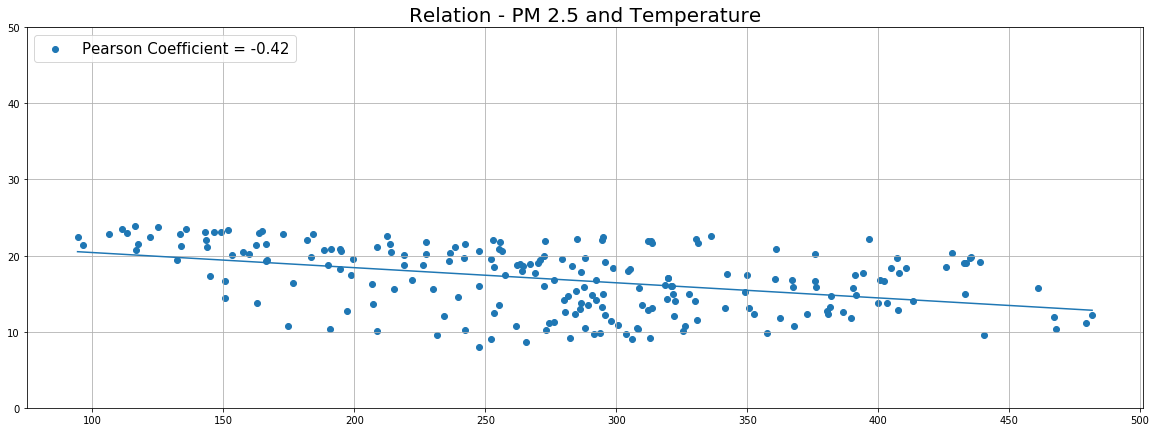

In [130]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
plt.scatter(pmsensor2_1h['PM_2_5'],weather_1h['Temperature  [2 m above gnd]'],label='Pearson Coefficient = -0.42')
plt.title('Relation - PM 2.5 and Temperature',fontsize=20)
plt.plot(np.unique(pmsensor2_1h['PM_2_5']), np.poly1d(np.polyfit(pmsensor2_1h['PM_2_5'],weather_1h['Temperature  [2 m above gnd]'], 1))(np.unique(pmsensor2_1h['PM_2_5'])))
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,50)
plt.grid(True)
plt.show()

In [131]:
stats.pearsonr(pmsensor2_1h['PM_2_5'],weather_1h['Mean Sea Level Pressure [MSL]'])

(-0.095738714257119, 0.1608781348342688)

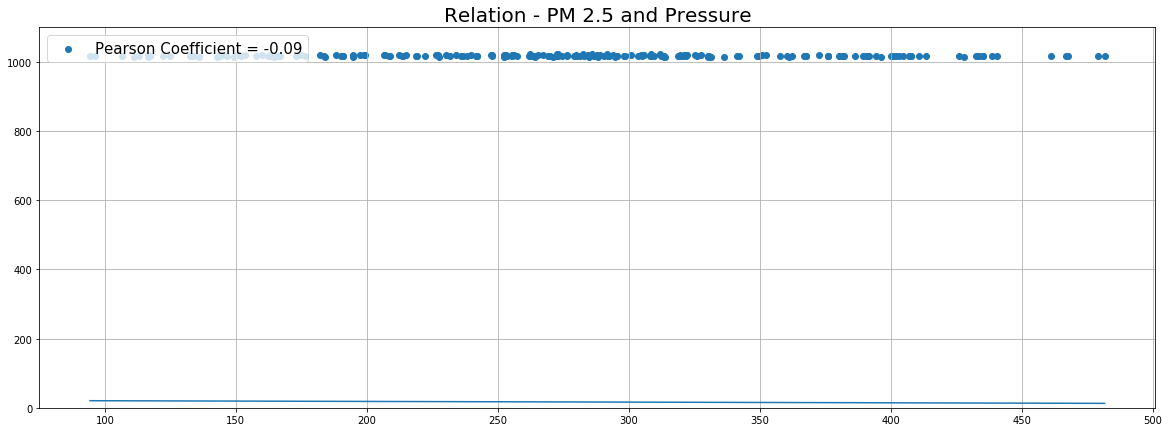

In [132]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
plt.scatter(pmsensor2_1h['PM_2_5'],weather_1h['Mean Sea Level Pressure [MSL]'],label='Pearson Coefficient = -0.09')
plt.title('Relation - PM 2.5 and Pressure',fontsize=20)
plt.plot(np.unique(pmsensor2_1h['PM_2_5']), np.poly1d(np.polyfit(pmsensor2_1h['PM_2_5'],weather_1h['Temperature  [2 m above gnd]'], 1))(np.unique(pmsensor2_1h['PM_2_5'])))
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,1100)
plt.grid(True)
plt.show()

In [133]:
stats.pearsonr(pmsensor2_1h['PM_2_5'],weather_1h['Wind Direction'])

(-0.3554862619577886, 7.843025190312412e-08)

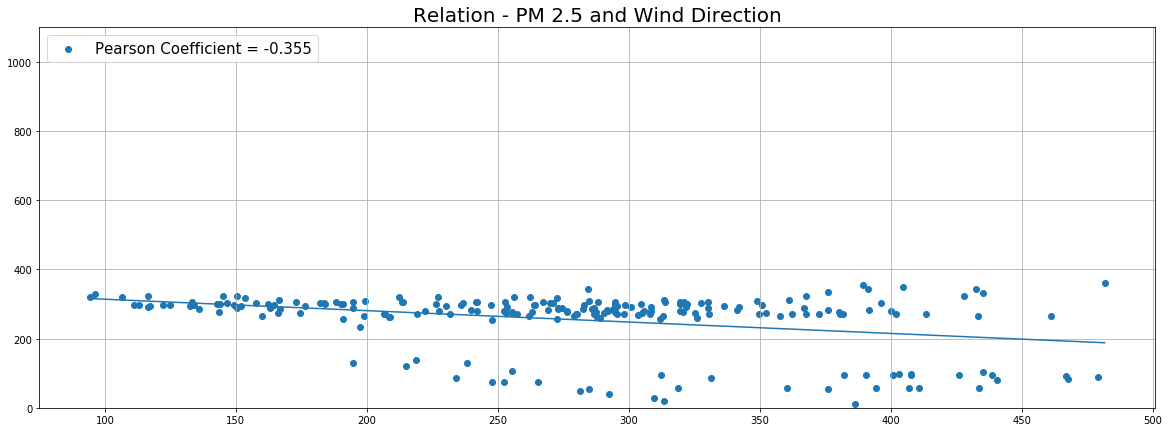

In [134]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
plt.scatter(pmsensor2_1h['PM_2_5'],weather_1h['Wind Direction'],label='Pearson Coefficient = -0.355')
plt.title('Relation - PM 2.5 and Wind Direction',fontsize=20)
plt.plot(np.unique(pmsensor2_1h['PM_2_5']), np.poly1d(np.polyfit(pmsensor2_1h['PM_2_5'],weather_1h['Wind Direction'], 1))(np.unique(pmsensor2_1h['PM_2_5'])))
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,1100)
plt.grid(True)
plt.show()

In [151]:
ref1 = pd.to_datetime('2018-12-18 00:00:00')
ref2 = pd.to_datetime('2018-12-18 23:59:59')
weather_d= weather.loc[(weather['DateTime']>=ref1) & (weather['DateTime']<ref2),:]
pmsensor2_1h_d = pmsensor2_1h.loc[(pmsensor2_1h.index>=ref1) & (pmsensor2_1h.index<ref2),:]

In [152]:
stats.pearsonr(pmsensor2_1h_d['PM_2_5'],weather_d['Temperature  [2 m above gnd]'])

(-0.8747976353756783, 2.2632182821082795e-08)

In [153]:
stats.pearsonr(pmsensor2_1h_d['PM_2_5'],weather_d['Relative Humidity [2m above gnd]'])

(0.7963059581363173, 3.248912265991447e-06)

In [154]:
stats.pearsonr(pmsensor2_1h_d['PM_2_5'],weather_d['Wind Speed  [10 m above gnd]'])

(-0.5170663312731086, 0.00967148104343918)

In [155]:
stats.pearsonr(pmsensor2_1h_d['PM_2_5'],weather_d['Mean Sea Level Pressure [MSL]'])

(0.6669821595057225, 0.00037127641714350846)

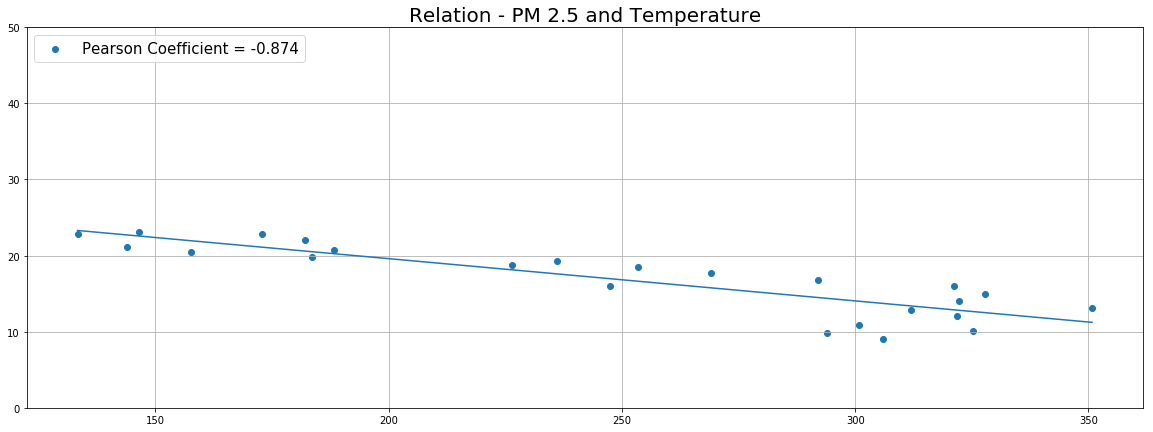

In [156]:
#Visualize the data
ax,fig = plt.subplots(figsize=(20,7))
plt.scatter(pmsensor2_1h_d['PM_2_5'],weather_d['Temperature  [2 m above gnd]'],label='Pearson Coefficient = -0.874')
plt.title('Relation - PM 2.5 and Temperature',fontsize=20)
plt.plot(np.unique(pmsensor2_1h_d['PM_2_5']), np.poly1d(np.polyfit(pmsensor2_1h_d['PM_2_5'],weather_d['Temperature  [2 m above gnd]'], 1))(np.unique(pmsensor2_1h_d['PM_2_5'])))
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,50)
plt.grid(True)
plt.show()